In [1]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use('ggplot')

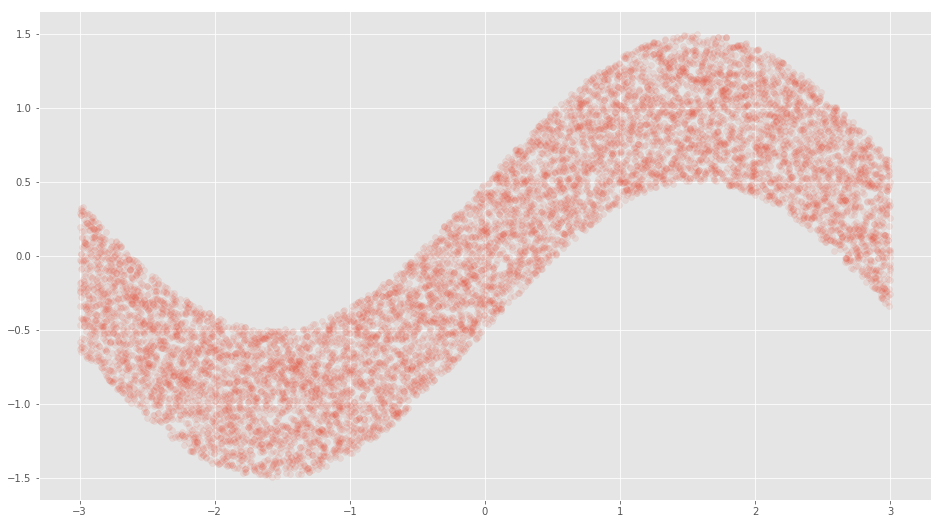

In [2]:
n = 10000
xs = np.linspace(-3, 3, n)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n)
plt.scatter(xs, ys, alpha = 0.1);

In [3]:
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

W = tf.Variable(
    tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'W')
b = tf.Variable(tf.constant([1], dtype = tf.float32), name = 'b')
preds = X * W + b

In [4]:
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [5]:
# cost = distance(preds, tf.sin(X)) # approximated by
cost = distance(preds, Y)

In [6]:
# Using a TF optimizer
cost = tf.reduce_mean(distance(preds, Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)\
    .minimize(cost)

In [7]:
n_iterations = 500

In [8]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        s.run(optimizer, feed_dict = { X: xs, Y: ys })
        training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
        
        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
            # If not in notebook:
            #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
            #fig.show()
            #plt.draw()
                        
            print('Training cost:', training_cost)
            
        # Quit when training improvement meets threshold
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost            

Training cost: 0.993379
Training cost: 0.910273
Training cost: 0.832673
Training cost: 0.761124
Training cost: 0.696867
Training cost: 0.64086
Training cost: 0.593287
Training cost: 0.553427
Training cost: 0.521068
Training cost: 0.495136
Training cost: 0.474596
Training cost: 0.458368
Training cost: 0.44538
Training cost: 0.435399
Training cost: 0.427631
Training cost: 0.421767
Training cost: 0.417415
Training cost: 0.414143
Training cost: 0.411768
Training cost: 0.410078
Training cost: 0.408799
Training cost: 0.407851
Training cost: 0.407152
Training cost: 0.406679
Training cost: 0.40635
Training cost: 0.406126
Training cost: 0.405966
Training cost: 0.405854
Training cost: 0.405775
Training cost: 0.405716
Training cost: 0.405673
Training cost: 0.405642
Training cost: 0.405618
Training cost: 0.405599
Training cost: 0.405587


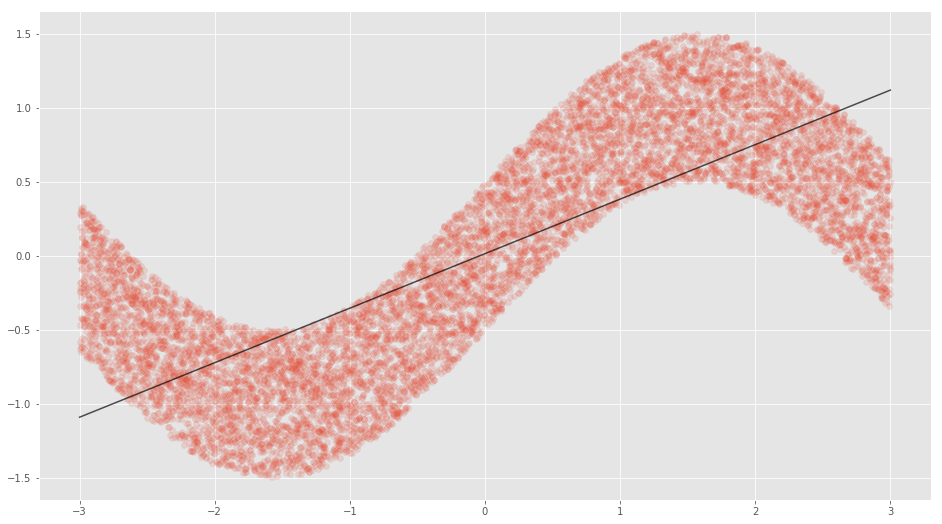

In [9]:
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15);
ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations);

## Stochastic and Mini Batch GD

In [10]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size

for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])
    
# BAD IDEA: network will pick up on orderin of data as a signal...
# better to randomize

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [11]:
rand_idxs = np.random.permutation(idxs)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[89 37 24  3 72  7 38 80  0 54]
[39 78 74 16 64 52 22 79 99 48]
[57 46 41 91 34 58 55 98 62 59]
[49 12 56 35  2 23 65 43 66 82]
[11 14 27  4 95 30 32 47  6 97]
[36 90 92 25 20 29 93 67 84 86]
[44 28 13 42 96  1 77 45  5 94]
[61 31 73 51 83 76  9 19 68 60]
[18 26  8 70 10 40 71 63 15 69]
[88 21 87 85 33 17 81 75 50 53]


In [12]:
# Incorporate mini-batching into previous:
batch_size = 1000
#fig, ax = plt.subplots(1, 1)
#ax.scatter(xs, ys, alpha=0.15, marker='+')
#ax.set_xlim([-4, 4])
#ax.set_ylim([-2, 2])

with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or 
    # tf.constant_intitializer, then this would have set `W` and `b` to 
    # their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={ X: xs[idxs_i], Y: ys[idxs_i] })

        training_cost = sess.run(cost, feed_dict={ X: xs, Y: ys })

        if it_i % 10 == 0:
            ys_pred = preds.eval(feed_dict={X: xs}, session=sess)
            #ax.plot(xs, preds, 'k', alpha=it_i / n_iterations)
            print(training_cost)
#fig.show()
#plt.draw()

0.987935
0.476459
0.408909
0.405672
0.405559
0.405554
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405554
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405554
0.405553
0.405553
0.405553
0.405553
0.405553
0.405553
0.405554
0.405554
0.405553
0.405553
0.405553
0.405553
0.405554
0.405553
0.405553
0.405553
0.405553
0.405553


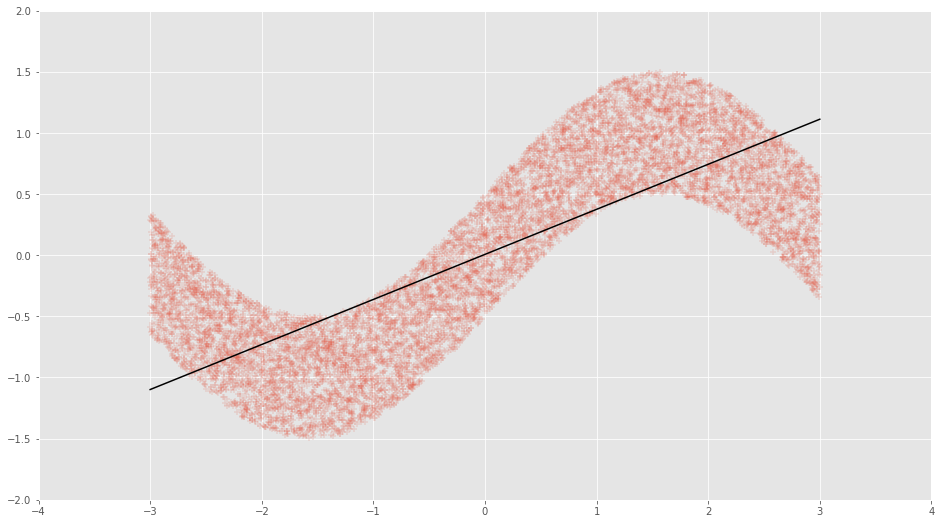

In [13]:
fig, ax = plt.subplots(1, 1);
ax.scatter(xs, ys, alpha = 0.15, marker='+');
ax.set_xlim([-4, 4]);
ax.set_ylim([-2, 2]);
ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations);

In [36]:
def train(X, Y, preds, n_iterations = 100, batch_size = 200, eta = 0.02):
    cost = tf.reduce_mean(distance(preds, Y))
    optimizer = tf.train.GradientDescentOptimizer(eta).minimize(cost)
    
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha = 0.15)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-1.7, 1.7])
    
    with tf.Session() as s:
        s.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size : 
                              (batch_i + 1) * batch_size]
                s.run(optimizer, feed_dict = { X: xs[idxs_i], 
                                               Y: ys[idxs_i] })
            
            training_cost = s.run(cost, feed_dict = { X: xs, Y: ys })
            
            if it_i % 10 == 0:
                ys_pred = preds.eval(feed_dict = { X: xs }, session = s)
                #ax.plot(xs, ys_pred, 'k', alpha = it_i / n_iterations)
                print(training_cost)
    #fig.show();
    #plt.draw();
    ax.plot(xs, ys_pred, 'k')

In [37]:
preds = tf.Variable(tf.random_normal([1]), name = 'bias')

for pow_i in range(0, 4):
    W = tf.Variable(tf.random_normal([1], stddev = 0.1), 
                    name = 'W_%d' %pow_i)
    preds = tf.add(tf.multiply(tf.pow(X, pow_i), W), preds)

0.389791
0.253177
0.25091
0.250838
0.250992
0.251065
0.256803
0.257942
0.254711
0.250842


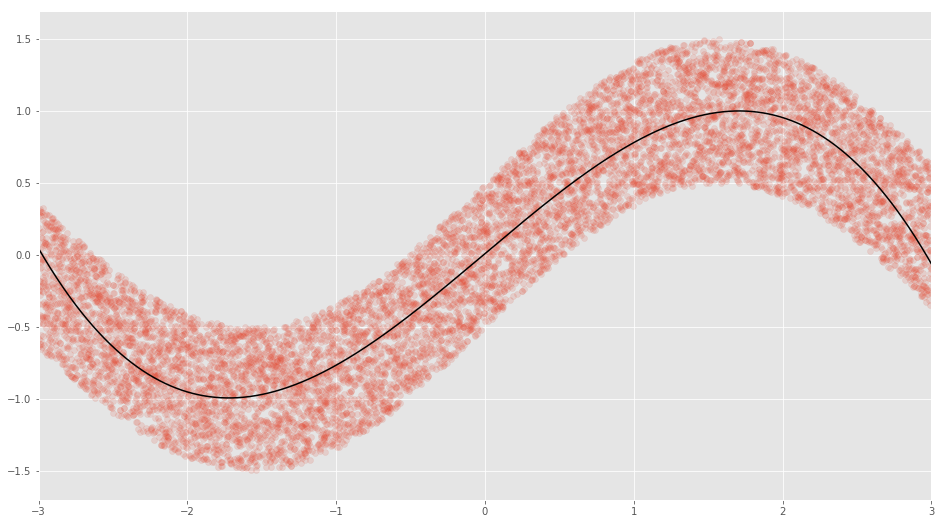

In [38]:
train(X, Y, preds, eta = 0.005)

In [39]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'W')
b = tf.Variable(tf.constant(0, dtype = tf.float32, shape = [n_neurons]), 
                name = 'b')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')

In [40]:
preds = tf.reduce_sum(h, 1)

3.13265
0.720378
0.408163
0.331236
0.2939
0.276834
0.269372
0.265644
0.263628
0.26242


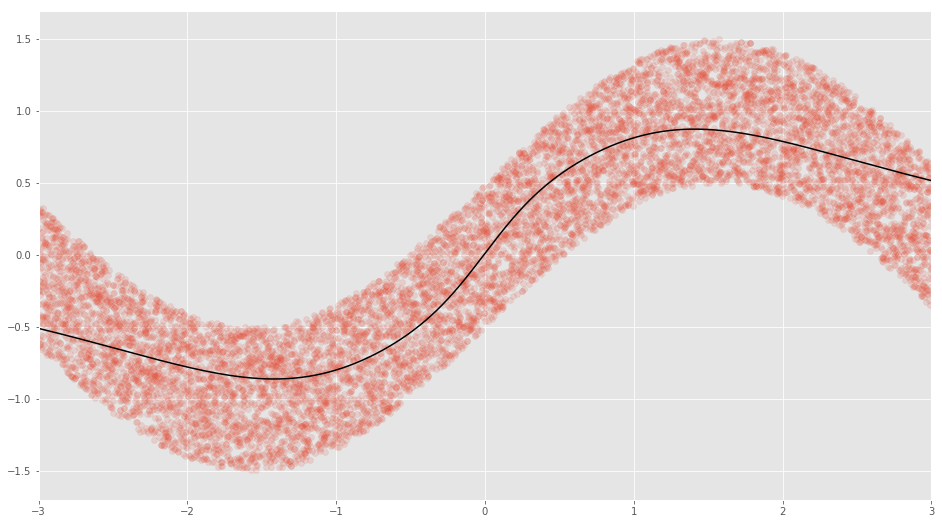

In [46]:
train(X, Y, preds, eta = 0.001)